In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import pymongo as pm
import numpy as np
import h5py
import scipy as sp
import scipy.stats as stats
import os

In [2]:
import tensorflow as tf
from models import alexnet

In [3]:
STIM_PATH="/share/kalanit/biac2/kgs/projects/Dawn/CS431/data/full_res/"

In [4]:
#testing with one training set (sets of 120 images)
with h5py.File(os.path.join(STIM_PATH,"Stimuli_Trn_FullRes_01.mat"),'r') as f:
    stim_set1 = f['stimTrn'][:]

In [5]:
stim_set1.shape

(500, 500, 120)

In [6]:
#make the actual pixel values match the alexnet training images
stim_set1 = stim_set1+.5

#transpose the images so that they make sense
stim_set1 = stim_set1.T
stim_set1.shape

(120, 500, 500)

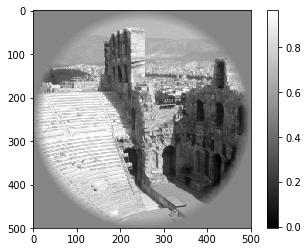

In [7]:
plt.imshow(stim_set1[10,:,:], cmap = "gray")
plt.colorbar()

In [8]:
#add pretend color channels
N = stim_set1[:,:,:,np.newaxis]
stim_set1_rgb = np.tile(N,(1,1,1,3))
stim_set1_rgb.shape

(120, 500, 500, 3)

In [9]:
#Alexnet checkpoint
LOAD_PATH = "checkpoints/model.ckpt-115000"

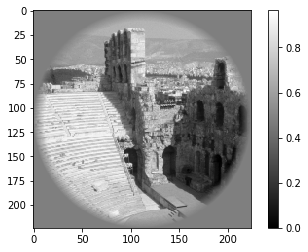

In [10]:
#create image tensor
images = stim_set1_rgb
image_tensor = tf.convert_to_tensor(images, dtype=tf.float32)
#resize for alexnet
resized_images = tf.image.resize_images(image_tensor, (224, 224))

#quick sanity check to make sure we didn't mess anything up resizing
with tf.Session() as sess:
    plt.imshow(sess.run(resized_images[10,:,:,:]),cmap = "gray")
    plt.colorbar()
    plt.show()

In [11]:
# initialize model
convnet = alexnet(resized_images)

In [12]:
# define output tensors of interest
conv3_outputs = convnet.layers['conv3']

# initialize tf Session and restore weighs
sess = tf.Session()
tf_saver_restore = tf.train.Saver()
tf_saver_restore.restore(sess, LOAD_PATH)


INFO:tensorflow:Restoring parameters from checkpoints/model.ckpt-115000


In [13]:
# run whatever tensors we care about
conv3_outputs = sess.run(conv3_outputs)
print(conv3_outputs.shape)

(120, 14, 14, 384)


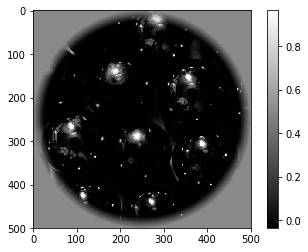

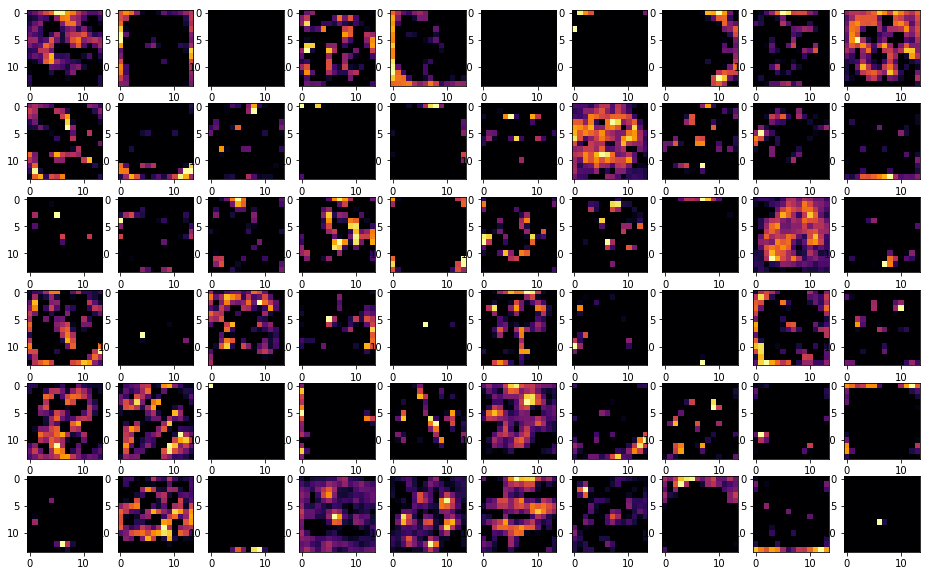

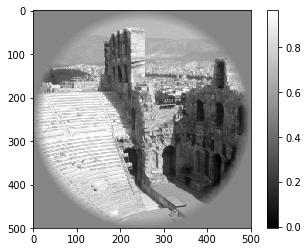

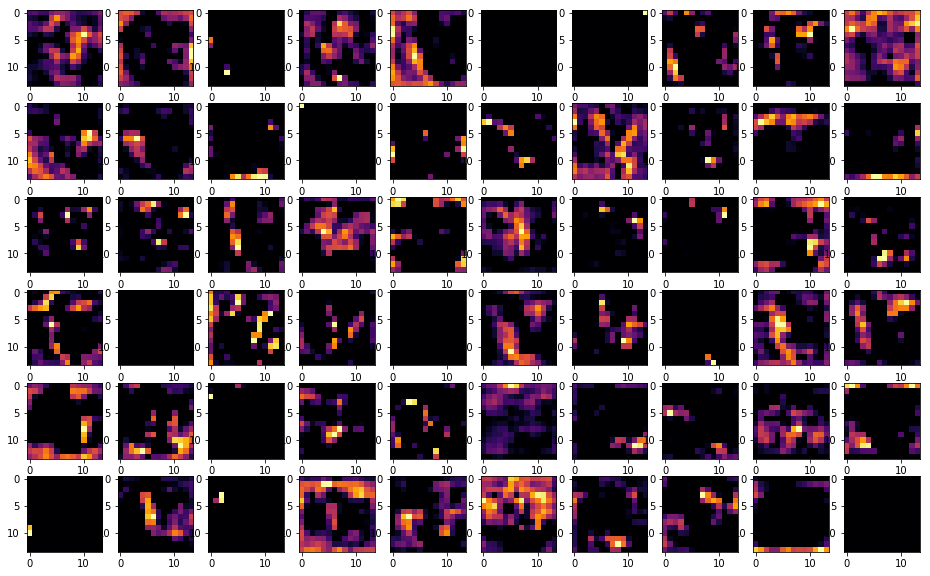

In [16]:
#visualize some features for kicks
for image_idx in [1, 10]:
    plt.figure()

    plt.imshow(stim_set1[image_idx,:,:], cmap = "gray")
    plt.colorbar()

    fav_image = conv3_outputs[image_idx,:,:,:]
    fav_image = np.moveaxis(fav_image, -1, 0) #put num of features in first column

    fig = plt.figure(figsize=(16,10))

    for idx in xrange(60):
        ax = fig.add_subplot(6, 10, idx+1) 
        ax.imshow(fav_image[idx,:,:], cmap="inferno") 
    #excellent we have logical features

In [86]:
num_train_batch = 15 #15th batch only has 20 images
stim_set = []

In [88]:
# now let's do this for all the training images, not just the first batch

# initialize tf Session and restore weighs
sess = tf.Session()
tf_saver_restore = tf.train.Saver()
tf_saver_restore.restore(sess, LOAD_PATH)

for idx in range(0,num_train_batch):
    if idx < 9:
        base_str = ['Stimuli_Trn_FullRes_0','.mat']
    else:
        base_str = ['Stimuli_Trn_FullRes_','.mat']
            
    num = str(idx+1)
    
    fullfile = num.join(base_str)
    
    with h5py.File(os.path.join(STIM_PATH,fullfile),'r') as f:
        stim_set = f['stimTrn'][:]
        
    #make the actual pixel values match the alexnet training images
    stim_set = stim_set+.5

    #transpose the images so that they make sense
    stim_set = stim_set.T

    #add pretend color channels
    N = stim_set[:,:,:,np.newaxis]
    stim_set_rgb = np.tile(N,(1,1,1,3))
    
    #create image tensor
    batch_images = stim_set_rgb
    batch_image_tensor = tf.convert_to_tensor(batch_images, dtype=tf.float32)
    #resize for alexnet
    batch_resized_images = tf.image.resize_images(batch_image_tensor, (224, 224))
    
    # initialize model
    batch_convnet = alexnet(batch_resized_images)

    # define output tensors of interest
    batch_conv3_outputs = batch_convnet.layers['conv3']

    # run whatever tensors we care about
    batch_conv3_outputs = sess.run(batch_conv3_outputs)
    
    if idx == 0:
        total_conv3_outputs = batch_conv3_outputs
    else:
        total_conv3_outputs = np.concatenate((total_conv3_outputs,batch_conv3_outputs),axis=0)
        
    print(total_conv3_outputs.shape)
    

INFO:tensorflow:Restoring parameters from checkpoints/model.ckpt-115000
(120, 14, 14, 384)
(240, 14, 14, 384)
(360, 14, 14, 384)
(480, 14, 14, 384)
(600, 14, 14, 384)
(720, 14, 14, 384)
(840, 14, 14, 384)
(960, 14, 14, 384)
(1080, 14, 14, 384)
(1200, 14, 14, 384)
(1320, 14, 14, 384)
(1440, 14, 14, 384)
(1560, 14, 14, 384)
(1680, 14, 14, 384)
(1750, 14, 14, 384)


In [95]:
# let's bring in the brain data
fmri_path="/share/kalanit/biac2/kgs/projects/Dawn/CS431/data/"

#read in the mat files
with h5py.File(os.path.join(fmri_path,"EstimatedResponses.mat"),'r') as fmri_dataset:
    train_S1 = fmri_dataset['dataTrnS1'][:]
    test_S1 = fmri_dataset['dataValS1'][:]
    roi_S1 = fmri_dataset['roiS1'][:]
    
    train_S2 = fmri_dataset['dataTrnS2'][:]
    test_S2 = fmri_dataset['dataValS2'][:]
    roi_S2 = fmri_dataset['roiS2'][:]


In [93]:
fmri_stim.shape

AttributeError: 'File' object has no attribute 'shape'